# Data Structures and Tensors in PyTorch

This section introduces the fundamental data structures of PyTorch, with particular emphasis on the tensor, which constitutes the core abstraction of the framework. The objective is to provide a clear and rigorous understanding of what a tensor is, how it is constructed, which types are available, and why it plays a central role throughout the entire deep learning workflow, from model design and experimentation to training and inference.

In PyTorch, tensors represent the primary means of storing and manipulating data. Conceptually, a tensor can be understood as a generalization of familiar mathematical objects such as scalars, vectors, and matrices to an arbitrary number of dimensions. Each tensor contains numerical values arranged according to a specific shape, which defines both its dimensionality and the size along each dimension. Depending on computational requirements, tensors may reside either in main memory on the CPU or in device memory on a GPU, enabling efficient execution of large-scale numerical operations.

From a practical perspective, PyTorch tensors are closely analogous to NumPy’s `ndarray`, sharing similar semantics and many common operations. However, tensors are specifically designed to support high-performance computation and seamless acceleration through specialized hardware, particularly graphics processing units. This capability makes tensors especially suitable for the intensive linear algebra operations that underpin modern deep learning models.

Within this context, the section explains how tensors can be created from predefined Python lists or matrix-like structures, and how their data types can be explicitly specified. This includes choosing between integer and floating-point representations, as well as selecting different levels of numerical precision. Such choices have direct implications for memory consumption, computational efficiency, and numerical stability.

In addition, the fundamental properties of tensors are examined in detail. These include the number of dimensions, accessible through the `ndim` attribute, the tensor’s shape, which describes its dimensional structure, and the device on which the tensor is stored, indicated by the `device` attribute. Understanding how to inspect and modify these properties is essential, as many tensor operations require compatible shapes, data types, and devices in order to execute correctly and efficiently. Collectively, these concepts form the foundation for effective and reliable use of PyTorch in deep learning applications.

## GPU Availability

In the context of machine learning, the use of GPUs allows significantly accelerating
tensor processing and the execution of large-scale neural models. PyTorch provides
utilities to verify if the system has a compatible GPU and to obtain information about
available devices. The following code snippet illustrates how to perform this check:

In [1]:
# 3pps
import torch


print(f"PyTorch version: {torch.__version__}")

if torch.cuda.is_available():
    print("GPU available")
    print(f"GPU name: {torch.cuda.get_device_name(0)}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
else:
    print("No GPU detected, CPU will be used")

PyTorch version: 2.9.1+cu128
No GPU detected, CPU will be used


This type of check is especially useful at the beginning of a Jupyter notebook or
training script, as it allows dynamically adapting the code to available hardware, moving
tensors and models to the appropriate device through operations like `tensor.to("cuda")`
or `model.to("cuda")`.

### Performance Comparison: CPU vs GPU

To illustrate the computational advantages of using GPUs, consider the following example
that compares the execution time of matrix multiplication operations on both devices:

In [2]:
# Standard libraries
import time


# Define matrix size
size = (5000, 5000)

# Create tensors on CPU and GPU
cpu_tensor = torch.rand(size)
if torch.cuda.is_available():
    gpu_tensor = torch.rand(size, device="cuda")

    # Measure CPU time
    start = time.time()
    cpu_result = cpu_tensor @ cpu_tensor
    cpu_time = time.time() - start
    print(f"CPU time: {cpu_time:.4f} seconds")

    # Measure GPU time
    start = time.time()
    gpu_result = gpu_tensor @ gpu_tensor
    torch.cuda.synchronize()  # Wait for GPU operations to complete
    gpu_time = time.time() - start
    print(f"GPU time: {gpu_time:.4f} seconds")
    print(f"Speedup: {cpu_time/gpu_time:.2f}x")

The `torch.cuda.synchronize()` call is essential to ensure accurate timing measurements,
as GPU operations are asynchronous by default.

## Introduction to Tensors

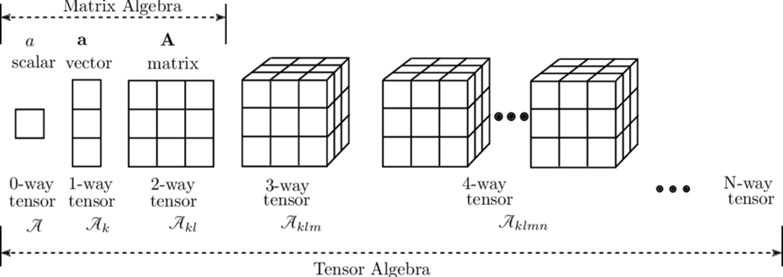

A tensor is the fundamental data structure in PyTorch. From an intuitive point of view, a
scalar is a 0-dimensional tensor, a vector is a 1-dimensional tensor, a matrix is a
2-dimensional tensor, and from there on, we speak of higher-order tensors (3D, 4D, etc.).
This generalization allows representing very diverse data, such as images, tokenized text
sequences, or multivariate time series, in a unified way.

Tensors allow storing data efficiently, both in CPU and GPU, and support a wide variety
of mathematical operations: additions, products, reductions, linear algebra operations,
and many others. Most deep learning algorithms are implemented as compositions of
operations on tensors.

### PyTorch Tensor Data Types

PyTorch supports various data types optimized for different use cases. The following
table summarizes the most common types:

| dtype                               | Description                   | Typical Use Case                                   | Memory per Element |
| ----------------------------------- | ----------------------------- | -------------------------------------------------- | ------------------ |
| `torch.float32` (or `torch.float`)  | 32-bit floating point         | Default type, general purpose training             | 4 bytes            |
| `torch.float64` (or `torch.double`) | 64-bit floating point         | High precision scientific computing                | 8 bytes            |
| `torch.float16` (or `torch.half`)   | 16-bit floating point         | Mixed precision training, inference acceleration   | 2 bytes            |
| `torch.bfloat16`                    | Brain floating point (16-bit) | Modern TPU/GPU training, better range than float16 | 2 bytes            |
| `torch.int64` (or `torch.long`)     | 64-bit integer                | Indices, labels, sizes                             | 8 bytes            |
| `torch.int32` (or `torch.int`)      | 32-bit integer                | Integer computations                               | 4 bytes            |
| `torch.int16` (or `torch.short`)    | 16-bit integer                | Memory-constrained integer storage                 | 2 bytes            |
| `torch.int8`                        | 8-bit integer                 | Quantized models, extreme memory savings           | 1 byte             |
| `torch.uint8`                       | 8-bit unsigned integer        | Image data (0-255 range)                           | 1 byte             |
| `torch.bool`                        | Boolean                       | Masks, logical conditions                          | 1 byte             |

The choice of data type significantly impacts memory consumption, computational speed,
and numerical stability. For instance, using `float16` can reduce memory usage by 50%
compared to `float32`, enabling training of larger models, but may require careful
handling of numerical underflow/overflow.

### Creating Tensors: Scalars, Vectors, Matrices, and Higher-Order Tensors

PyTorch facilitates the creation of tensors of different dimensions. The following code
snippet illustrates how to construct a scalar, a vector, a matrix, and a higher-order
tensor:

In [3]:
# Scalar tensor
scalar = torch.tensor(7)
scalar

tensor(7)

A scalar has no additional dimensions, so its number of dimensions is 0:

In [4]:
scalar.ndim

0

To obtain the Python numerical value associated with the scalar, the `.item()` method is
used:

In [5]:
scalar.item()

7

From there, vectors (1-dimensional tensors) can be defined by providing a list of values:

In [6]:
# Creating a vector
vector = torch.tensor([7, 7])
print(vector)
print(vector.ndim)
print(vector.shape)

tensor([7, 7])
1
torch.Size([2])


In this case, `vector.ndim` returns `1`, and `vector.shape` indicates the vector's
length. Similarly, a matrix is represented as a list of lists, generating a 2-dimensional
tensor:

In [7]:
# Creating a matrix
matrix = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(matrix)
print(matrix.ndim)
print(matrix.shape)

tensor([[1, 2, 3],
        [4, 5, 6]])
2
torch.Size([2, 3])


The above matrix has two rows and three columns, so its shape is `(2, 3)`.

Higher-order tensors are constructed by nesting additional lists. For example, the
following tensor has three dimensions, organized hierarchically:

In [8]:
# Creating a three-dimensional tensor
tensor = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [6, 4, 3]]])
print(tensor)
print(tensor.ndim)
print(tensor.shape)

tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[7, 8, 9],
         [6, 4, 3]]])
3
torch.Size([2, 2, 3])


The `shape` attribute describes the size of each dimension. Understanding this structure
is key to designing and interpreting neural network architectures, as the inputs and
outputs of each layer are represented as tensors with specific shapes.

### Creating Tensors with Values

In practice, it is very common to create test tensors or initialize model parameters
using random values. PyTorch allows creating tensors with values generated randomly from
different distributions. For example:

In [9]:
# Random tensors
random_tensor = torch.rand((2, 3, 4))
print(random_tensor)
random_tensor.ndim, random_tensor.shape

tensor([[[0.7319, 0.6792, 0.0530, 0.1782],
         [0.5746, 0.8844, 0.1616, 0.1229],
         [0.5827, 0.4093, 0.8628, 0.5392]],

        [[0.6035, 0.9491, 0.9427, 0.3746],
         [0.9816, 0.9623, 0.2767, 0.1142],
         [0.7656, 0.7438, 0.4404, 0.3085]]])


(3, torch.Size([2, 3, 4]))

Here a tensor with shape `(2, 3, 4)` is created whose elements are uniformly distributed
in the interval `[0, 1)`. This type of tensor is useful for:

1. Verifying that input and output dimensions of a model are coherent between layers.
2. Checking that internal operations are performed without errors before using real data.
3. Exploring model behavior in unit tests or quick experiments.

In addition to random tensors, it is common to use tensors initialized with zeros or
ones, for example, to define masks, templates, or initial values:

In [10]:
zero_tensors = torch.zeros((3, 4))
zero_tensors

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [11]:
ones_tensors = torch.ones((3, 4))
ones_tensors

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

You can also create tensors containing sequences of equally spaced values using
`torch.arange`:

In [12]:
range_tensor = torch.arange(start=0, end=100, step=2)
print(range_tensor)
print(f"Shape of 'range_tensor': {range_tensor.shape}")

tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
        36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70,
        72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])
Shape of 'range_tensor': torch.Size([50])


This tensor contains values from 0 to 98 with a step of 2. From it, other tensors that
inherit its shape can be constructed:

In [13]:
# Create a tensor with the same dimension as another tensor
range_copy = torch.zeros_like(input=range_tensor)
print(f"Shape of 'range_copy': {range_copy.shape}")
range_copy

Shape of 'range_copy': torch.Size([50])


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])

The use of functions like `zeros_like` or `ones_like` facilitates creating tensors
compatible in shape and data type with existing ones.

### Conversion Between NumPy and PyTorch

PyTorch tensors and NumPy arrays are closely related, and conversion between them is
straightforward and efficient. This interoperability is crucial when integrating PyTorch
with other scientific computing libraries.

In [14]:
# 3pps
import numpy as np


# NumPy array to PyTorch tensor
numpy_array = np.array([[1, 2, 3], [4, 5, 6]])
tensor_from_numpy = torch.from_numpy(numpy_array)
print(f"Original NumPy array:\n{numpy_array}")
print(f"Converted tensor:\n{tensor_from_numpy}")
print(f"Tensor dtype: {tensor_from_numpy.dtype}")

# PyTorch tensor to NumPy array
tensor = torch.tensor([[7, 8, 9], [10, 11, 12]])
numpy_from_tensor = tensor.numpy()
print(f"\nOriginal tensor:\n{tensor}")
print(f"Converted NumPy array:\n{numpy_from_tensor}")

Original NumPy array:
[[1 2 3]
 [4 5 6]]
Converted tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])
Tensor dtype: torch.int64

Original tensor:
tensor([[ 7,  8,  9],
        [10, 11, 12]])
Converted NumPy array:
[[ 7  8  9]
 [10 11 12]]


**Important considerations:**

1. **Memory sharing**: By default, `torch.from_numpy()` creates a tensor that shares
   memory with the original NumPy array. Modifications to one will affect the other.

In [15]:
# Demonstrate memory sharing
np_array = np.array([1, 2, 3])
tensor = torch.from_numpy(np_array)
np_array[0] = 999
print(f"Modified NumPy array: {np_array}")
print(f"Tensor (shares memory): {tensor}")  # Also shows 999

Modified NumPy array: [999   2   3]
Tensor (shares memory): tensor([999,   2,   3])


2. **GPU tensors**: Tensors on GPU must be moved to CPU before converting to NumPy:

In [16]:
if torch.cuda.is_available():
    gpu_tensor = torch.tensor([1, 2, 3], device="cuda")
    # This would raise an error: gpu_tensor.numpy()
    numpy_from_gpu = gpu_tensor.cpu().numpy()  # Correct approach

3. **Gradient tracking**: Tensors with gradients enabled must have gradients detached:

In [17]:
tensor_with_grad = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
# This would raise an error: tensor_with_grad.numpy()
numpy_array = tensor_with_grad.detach().numpy()  # Correct approach

### Data Types, Devices, and Tensor Compatibility

Each tensor in PyTorch is characterized, among other aspects, by its data type (`dtype`),
its shape (`shape`), and the computing device on which it resides (`device`). These
attributes influence operation compatibility and computational performance. When
operations are performed between tensors whose data types do not match, whose dimensions
are not compatible for the defined operation, or that are on different devices (for
example, one on CPU and another on GPU), conflicts and errors can occur during execution.

The following snippet shows how to inspect these properties:

In [18]:
tensor = torch.rand(size=(2, 2, 3))
tensor

tensor([[[0.3310, 0.7286, 0.5154],
         [0.7631, 0.1078, 0.0951]],

        [[0.1155, 0.5658, 0.4222],
         [0.8116, 0.3659, 0.8505]]])

In [19]:
print(f"Data type: {tensor.dtype}")
print(f"Shape: {tensor.shape}")
print(f"Device: {tensor.device}")

Data type: torch.float32
Shape: torch.Size([2, 2, 3])
Device: cpu


By default, floating-point tensors are created with type `torch.float32`. However, it is
possible to specify a different data type, such as `float16` or `float64`:

In [20]:
tensor = torch.rand(size=(2, 2, 3), dtype=torch.float16)
tensor

tensor([[[0.9014, 0.6221, 0.9561],
         [0.8164, 0.3057, 0.8794]],

        [[0.3350, 0.0645, 0.3784],
         [0.6958, 0.1509, 0.9800]]], dtype=torch.float16)

In [21]:
print(f"Data type: {tensor.dtype}")
print(f"Shape: {tensor.shape}")
print(f"Device: {tensor.device}")

Data type: torch.float16
Shape: torch.Size([2, 2, 3])
Device: cpu


The choice of numerical precision involves a trade-off between computational cost, memory
consumption, training stability, and result accuracy. For example, `float16` allows
significantly accelerating training and inference on appropriate hardware, but may
increase the risk of numerical stability problems in certain models.

In general, it is important that tensors involved in the same operation share a
compatible data type and are on the same device. Otherwise, it is necessary to explicitly
convert the type (`tensor.to(torch.float32)`, `tensor.int()`, etc.) or move the tensor to
the corresponding device (`tensor.to("cuda")`, `tensor.to("cpu")`).

### Common Errors and Best Practices

When working with tensors, certain errors frequently arise. Understanding these common
pitfalls helps prevent debugging headaches:

#### 1. Incompatible Dimensions

In [22]:
# Error: dimension mismatch
try:
    a = torch.rand(2, 3)
    b = torch.rand(3, 5)
    c = a + b  # Raises error: shapes [2, 3] and [3, 5] are incompatible
except RuntimeError as e:
    print(f"Error: {e}")

# Correct: use matrix multiplication for different shapes
c = torch.matmul(a, b)  # Results in shape [2, 5]
print(f"Correct result shape: {c.shape}")

Error: The size of tensor a (3) must match the size of tensor b (5) at non-singleton dimension 1
Correct result shape: torch.Size([2, 5])


#### 2. Device Mismatch

In [23]:
# Error: tensors on different devices
if torch.cuda.is_available():
    try:
        cpu_tensor = torch.rand(2, 3)
        gpu_tensor = torch.rand(2, 3, device="cuda")
        result = cpu_tensor + gpu_tensor  # Raises error
    except RuntimeError as e:
        print(f"Error: {e}")

    # Correct: ensure both tensors are on the same device
    result = cpu_tensor.to("cuda") + gpu_tensor
    # Or: result = cpu_tensor + gpu_tensor.to('cpu')

#### 3. Data Type Incompatibility

In [24]:
# Error: incompatible data types
try:
    int_tensor = torch.tensor([1, 2, 3], dtype=torch.int32)
    float_tensor = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)
    # Some operations may fail or produce unexpected results
    result = int_tensor / float_tensor  # Works but with implicit conversion
except Exception as e:
    print(f"Error: {e}")

# Best practice: explicit type conversion
result = int_tensor.float() / float_tensor
print(f"Result dtype: {result.dtype}")

Result dtype: torch.float32


#### 4. Gradient-Related Issues

In [25]:
# Error: modifying tensors with gradients in-place
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = x**2

try:
    x[0] = 10.0  # In-place modification raises error
except RuntimeError as e:
    print(f"Error: {e}")

# Correct: use operations that don't modify tensors in-place
x_new = torch.tensor([10.0, 2.0, 3.0], requires_grad=True)
y = x_new**2

Error: a view of a leaf Variable that requires grad is being used in an in-place operation.


#### 5. Memory Leaks with Gradients

In [26]:
# Potential memory leak: accumulating gradients in a loop
losses = []
for i in range(100):
    x = torch.randn(1000, 1000, requires_grad=True)
    y = x.sum()
    # losses.append(y)  # BAD: keeps entire computational graph
    losses.append(y.item())  # GOOD: only stores the scalar value

### Basic Operations

Once tensors are created, PyTorch allows applying various reduction and aggregation
operations on them. For example, you can calculate maximums, means, or maximum indices
along specific dimensions. Consider the following two-dimensional tensor:

In [27]:
tensor = torch.rand(size=(2, 3))
tensor

tensor([[0.5802, 0.1192, 0.8978],
        [0.7366, 0.8610, 0.3174]])

The `max` method allows obtaining the maximum value along a dimension and its index:

In [28]:
# Maximum by columns (dimension 0)
tensor.max(dim=0)

torch.return_types.max(
values=tensor([0.7366, 0.8610, 0.8978]),
indices=tensor([1, 1, 0]))

In [29]:
# Maximum by rows (dimension 1)
tensor.max(dim=1)

torch.return_types.max(
values=tensor([0.8978, 0.8610]),
indices=tensor([2, 1]))

In this context, the convention is adopted that columns correspond to axis or dimension
`0`, while rows are associated with axis or dimension `1`. Similarly, the mean can be
calculated:

In [30]:
tensor.mean(dim=0), tensor.mean(dim=1)

(tensor([0.6584, 0.4901, 0.6076]), tensor([0.5324, 0.6384]))

In [31]:
torch.mean(tensor, dim=0), torch.mean(tensor, dim=1)

(tensor([0.6584, 0.4901, 0.6076]), tensor([0.5324, 0.6384]))

The `argmax` function returns the indices of maximum values along a determined dimension:

In [32]:
torch.argmax(tensor, dim=0), tensor.argmax(dim=0)

(tensor([1, 1, 0]), tensor([1, 1, 0]))

In [33]:
tensor.argmax(dim=1)

tensor([2, 1])

These indices can be used to select elements or substructures of the tensor. For example:

In [34]:
tensor

tensor([[0.5802, 0.1192, 0.8978],
        [0.7366, 0.8610, 0.3174]])

In [35]:
tensor[:, tensor.argmax(dim=1)[0]]

tensor([0.8978, 0.3174])

Here all rows and the column corresponding to the largest value of the first row are
selected, illustrating how to combine reduction operations with indexing.

### Mathematical Operations Between Tensors

PyTorch supports a comprehensive set of mathematical operations between tensors.
Understanding the differences between element-wise operations, matrix multiplication, and
broadcasting is fundamental.

#### Element-wise Operations

Element-wise operations apply to corresponding elements of tensors with compatible
shapes:

In [36]:
a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
b = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

# Element-wise addition
print("Addition (a + b):")
print(a + b)

# Element-wise subtraction
print("\nSubtraction (a - b):")
print(a - b)

# Element-wise multiplication
print("\nElement-wise multiplication (a * b):")
print(a * b)

# Element-wise division
print("\nElement-wise division (a / b):")
print(a / b)

# Element-wise power
print("\nPower (a ** 2):")
print(a**2)

Addition (a + b):
tensor([[ 6.,  8.],
        [10., 12.]])

Subtraction (a - b):
tensor([[-4., -4.],
        [-4., -4.]])

Element-wise multiplication (a * b):
tensor([[ 5., 12.],
        [21., 32.]])

Element-wise division (a / b):
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])

Power (a ** 2):
tensor([[ 1.,  4.],
        [ 9., 16.]])


#### Matrix Multiplication

PyTorch provides multiple ways to perform matrix multiplication, each with specific use
cases:

In [37]:
a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
b = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

# Method 1: torch.matmul (recommended, works with batched matrices)
result1 = torch.matmul(a, b)
print("torch.matmul(a, b):")
print(result1)

# Method 2: @ operator (syntactic sugar for matmul)
result2 = a @ b
print("\na @ b:")
print(result2)

# Method 3: torch.mm (only for 2D matrices)
result3 = torch.mm(a, b)
print("\ntorch.mm(a, b):")
print(result3)

# Verify all methods give the same result
print(
    f"\nAll methods equivalent: {torch.equal(result1, result2) and torch.equal(result2, result3)}"
)

torch.matmul(a, b):
tensor([[19., 22.],
        [43., 50.]])

a @ b:
tensor([[19., 22.],
        [43., 50.]])

torch.mm(a, b):
tensor([[19., 22.],
        [43., 50.]])

All methods equivalent: True


**Key differences:**

- `torch.matmul` (or `@`): Most versatile, handles broadcasting and batched operations
- `torch.mm`: Only for 2D matrices, slightly faster but less flexible
- `*`: Element-wise multiplication (NOT matrix multiplication)

#### Broadcasting

Broadcasting allows operations between tensors of different shapes by automatically
expanding dimensions:

In [38]:
# Example 1: Scalar and tensor
a = torch.tensor([[1, 2, 3], [4, 5, 6]])
b = 10
result = a + b  # b is broadcasted to match a's shape
print("Tensor + Scalar:")
print(result)

# Example 2: Vector and matrix
a = torch.tensor([[1, 2, 3], [4, 5, 6]])  # Shape: (2, 3)
b = torch.tensor([10, 20, 30])  # Shape: (3,)
result = a + b  # b is broadcasted along dim 0
print("\nMatrix + Vector:")
print(result)

# Example 3: Broadcasting with unsqueeze
a = torch.tensor([[1], [2], [3]])  # Shape: (3, 1)
b = torch.tensor([10, 20])  # Shape: (2,)
result = a + b  # Broadcasted to (3, 2)
print("\nBroadcasting with different dimensions:")
print(result)
print(f"Result shape: {result.shape}")

Tensor + Scalar:
tensor([[11, 12, 13],
        [14, 15, 16]])

Matrix + Vector:
tensor([[11, 22, 33],
        [14, 25, 36]])

Broadcasting with different dimensions:
tensor([[11, 21],
        [12, 22],
        [13, 23]])
Result shape: torch.Size([3, 2])


**Broadcasting rules:**

1. Dimensions are aligned from right to left
2. Dimensions must be equal, one of them must be 1, or one doesn't exist
3. The result has the maximum size along each dimension

#### In-place Operations

Operations ending with an underscore (`_`) modify tensors in-place, saving memory but
potentially causing issues with gradient computation:

In [39]:
x = torch.tensor([1, 2, 3], dtype=torch.float32)
print(f"Original x: {x}")
print(f"Memory address: {x.data_ptr()}")

# In-place addition
x.add_(5)
print(f"After add_(5): {x}")
print(f"Memory address: {x.data_ptr()}")  # Same address

# In-place multiplication
x.mul_(2)
print(f"After mul_(2): {x}")

# Compare with non-in-place operations
y = torch.tensor([1, 2, 3], dtype=torch.float32)
print(f"\nOriginal y: {y}")
print(f"Memory address: {y.data_ptr()}")

y = y + 5  # Creates new tensor
print(f"After y = y + 5: {y}")
print(f"Memory address: {y.data_ptr()}")  # Different address

Original x: tensor([1., 2., 3.])
Memory address: 360139200
After add_(5): tensor([6., 7., 8.])
Memory address: 360139200
After mul_(2): tensor([12., 14., 16.])

Original y: tensor([1., 2., 3.])
Memory address: 360110272
After y = y + 5: tensor([6., 7., 8.])
Memory address: 360141760


**Warning:** Avoid in-place operations on tensors with `requires_grad=True` as they can
cause errors during backpropagation.

### Tensor Reshaping and Manipulation

Understanding how to reshape and manipulate tensors is crucial for building neural
networks, as layer outputs often need to be reshaped to match subsequent layer inputs.

#### View, Reshape, and Flatten

In [40]:
# Create a sample tensor
x = torch.arange(12)
print(f"Original tensor: {x}")
print(f"Shape: {x.shape}")

# Using view (shares memory with original tensor)
x_view = x.view(3, 4)
print(f"\nView as (3, 4):\n{x_view}")

# Using reshape (may create a copy if necessary)
x_reshape = x.reshape(2, 6)
print(f"\nReshape as (2, 6):\n{x_reshape}")

# Using -1 for automatic dimension calculation
x_auto = x.view(3, -1)  # -1 automatically becomes 4
print(f"\nView as (3, -1):\n{x_auto}")

# Flatten: convert to 1D
x_flat = x.view(-1)
print(f"\nFlattened: {x_flat}")

# Flatten with method
x_flat2 = x.flatten()
print(f"Flatten method: {x_flat2}")

Original tensor: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Shape: torch.Size([12])

View as (3, 4):
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Reshape as (2, 6):
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])

View as (3, -1):
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Flattened: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Flatten method: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])


**Key differences:**

- `view()`: Returns a view of the original tensor (shares memory), requires contiguous
  memory
- `reshape()`: May return a view or copy, more flexible but potentially less efficient
- `flatten()`: Always returns a 1D tensor

#### Memory Contiguity

In [41]:
# Demonstrate the difference between view and reshape with transpose
x = torch.arange(12).reshape(3, 4)
print(f"Original:\n{x}")
print(f"Is contiguous: {x.is_contiguous()}")

# Transpose makes tensor non-contiguous
x_t = x.t()
print(f"\nTransposed:\n{x_t}")
print(f"Is contiguous: {x_t.is_contiguous()}")

# view() fails on non-contiguous tensor
try:
    x_t.view(12)
except RuntimeError as e:
    print(f"\nError with view(): {e}")

# reshape() works (creates a copy)
x_t_reshaped = x_t.reshape(12)
print(f"\nReshape works: {x_t_reshaped}")

# Make contiguous explicitly
x_t_cont = x_t.contiguous()
x_t_view = x_t_cont.view(12)
print(f"After contiguous(), view works: {x_t_view}")

Original:
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
Is contiguous: True

Transposed:
tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])
Is contiguous: False

Error with view(): view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

Reshape works: tensor([ 0,  4,  8,  1,  5,  9,  2,  6, 10,  3,  7, 11])
After contiguous(), view works: tensor([ 0,  4,  8,  1,  5,  9,  2,  6, 10,  3,  7, 11])


#### Squeeze and Unsqueeze

These operations add or remove dimensions of size 1:

In [42]:
# Create a tensor with dimensions of size 1
x = torch.rand(1, 3, 1, 4)
print(f"Original shape: {x.shape}")

# Remove all dimensions of size 1
x_squeezed = x.squeeze()
print(f"After squeeze(): {x_squeezed.shape}")

# Remove specific dimension
x_squeezed_dim = x.squeeze(dim=0)
print(f"After squeeze(dim=0): {x_squeezed_dim.shape}")

# Add dimension
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"After unsqueeze(dim=0): {x_unsqueezed.shape}")

# Practical example: preparing batch dimension
single_image = torch.rand(3, 224, 224)  # C, H, W
batched_image = single_image.unsqueeze(0)  # Add batch dimension: B, C, H, W
print(f"\nSingle image shape: {single_image.shape}")
print(f"Batched image shape: {batched_image.shape}")

Original shape: torch.Size([1, 3, 1, 4])
After squeeze(): torch.Size([3, 4])
After squeeze(dim=0): torch.Size([3, 1, 4])
After unsqueeze(dim=0): torch.Size([1, 3, 4])

Single image shape: torch.Size([3, 224, 224])
Batched image shape: torch.Size([1, 3, 224, 224])


### Concatenation and Stacking

Combining multiple tensors is a common operation in deep learning:

In [43]:
# Create sample tensors
a = torch.ones(2, 3)
b = torch.zeros(2, 3)
c = torch.full((2, 3), 0.5)

print("Tensor a:")
print(a)
print("\nTensor b:")
print(b)
print("\nTensor c:")
print(c)

# Concatenation along dimension 0 (rows)
cat_dim0 = torch.cat([a, b, c], dim=0)
print(f"\nConcatenate along dim=0:")
print(cat_dim0)
print(f"Shape: {cat_dim0.shape}")

# Concatenation along dimension 1 (columns)
cat_dim1 = torch.cat([a, b, c], dim=1)
print(f"\nConcatenate along dim=1:")
print(cat_dim1)
print(f"Shape: {cat_dim1.shape}")

# Stacking creates a new dimension
stacked = torch.stack([a, b, c], dim=0)
print(f"\nStack along dim=0:")
print(stacked)
print(f"Shape: {stacked.shape}")

# Stack along different dimension
stacked_dim1 = torch.stack([a, b, c], dim=1)
print(f"\nStack along dim=1 shape: {stacked_dim1.shape}")

Tensor a:
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Tensor b:
tensor([[0., 0., 0.],
        [0., 0., 0.]])

Tensor c:
tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]])

Concatenate along dim=0:
tensor([[1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]])
Shape: torch.Size([6, 3])

Concatenate along dim=1:
tensor([[1.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.5000, 0.5000, 0.5000],
        [1.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.5000, 0.5000, 0.5000]])
Shape: torch.Size([2, 9])

Stack along dim=0:
tensor([[[1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000]],

        [[0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]]])
Shape: torch.Size([3, 2, 3])

Stack along dim=1 shape: torch.Size([2, 3, 3])


**Key differences:**

- `torch.cat()`: Concatenates along an existing dimension
- `torch.stack()`: Creates a new dimension and stacks along it

#### Splitting Tensors

In [44]:
# Create a tensor to split
x = torch.arange(24).reshape(4, 6)
print("Original tensor:")
print(x)
print(f"Shape: {x.shape}")

# Split into equal chunks
chunks = torch.split(x, split_size_or_sections=2, dim=0)
print(f"\nSplit into chunks of size 2 along dim=0:")
for i, chunk in enumerate(chunks):
    print(f"Chunk {i} shape: {chunk.shape}")
    print(chunk)

# Split into specific sizes
split_sizes = [1, 2, 3]
custom_chunks = torch.split(x, split_sizes, dim=1)
print(f"\nSplit into custom sizes {split_sizes} along dim=1:")
for i, chunk in enumerate(custom_chunks):
    print(f"Chunk {i} shape: {chunk.shape}")

# Chunk: split into specified number of chunks
num_chunks = 2
chunked = torch.chunk(x, chunks=num_chunks, dim=0)
print(f"\nChunk into {num_chunks} parts:")
for i, chunk in enumerate(chunked):
    print(f"Chunk {i} shape: {chunk.shape}")

Original tensor:
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]])
Shape: torch.Size([4, 6])

Split into chunks of size 2 along dim=0:
Chunk 0 shape: torch.Size([2, 6])
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
Chunk 1 shape: torch.Size([2, 6])
tensor([[12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]])

Split into custom sizes [1, 2, 3] along dim=1:
Chunk 0 shape: torch.Size([4, 1])
Chunk 1 shape: torch.Size([4, 2])
Chunk 2 shape: torch.Size([4, 3])

Chunk into 2 parts:
Chunk 0 shape: torch.Size([2, 6])
Chunk 1 shape: torch.Size([2, 6])


### Indexing

PyTorch also allows performing advanced indexing operations and constructing submatrices
through slicing techniques. Consider a random matrix of size `(4, 4)`:

In [45]:
matrix = torch.rand((4, 4))
matrix

tensor([[0.2717, 0.6154, 0.4069, 0.8359],
        [0.1893, 0.2178, 0.6230, 0.2607],
        [0.5701, 0.5434, 0.6506, 0.3638],
        [0.9924, 0.3657, 0.8248, 0.6186]])

It is possible to extract submatrices taking one element out of every two in both
dimensions:

In [46]:
submatrix_1 = matrix[0::2, 0::2]
submatrix_2 = matrix[0::2, 1::2]
submatrix_3 = matrix[1::2, 0::2]
submatrix_4 = matrix[1::2, 1::2]

submatrix_1, submatrix_2, submatrix_3, submatrix_4

(tensor([[0.2717, 0.4069],
         [0.5701, 0.6506]]),
 tensor([[0.6154, 0.8359],
         [0.5434, 0.3638]]),
 tensor([[0.1893, 0.6230],
         [0.9924, 0.8248]]),
 tensor([[0.2178, 0.2607],
         [0.3657, 0.6186]]))

These submatrices can be stacked along a new dimension using `torch.stack`:

In [47]:
submatrices = torch.stack([submatrix_1, submatrix_2, submatrix_3, submatrix_4])
submatrices

tensor([[[0.2717, 0.4069],
         [0.5701, 0.6506]],

        [[0.6154, 0.8359],
         [0.5434, 0.3638]],

        [[0.1893, 0.6230],
         [0.9924, 0.8248]],

        [[0.2178, 0.2607],
         [0.3657, 0.6186]]])

In [48]:
submatrices.shape

torch.Size([4, 2, 2])

The result is a tensor in which each submatrix occupies a position along the first
dimension. If you want to add an additional dimension, you can use `unsqueeze`:

In [49]:
print(submatrices.shape)
submatrices = submatrices.unsqueeze(dim=0)
submatrices.shape

torch.Size([4, 2, 2])


torch.Size([1, 4, 2, 2])

From this tensor, different operations can be performed. For example, we will calculate
the Frobenius matrix norm (the Frobenius norm is equivalent to the square root of the sum
of squares of all matrix elements) of each submatrix using `torch.linalg.matrix_norm`:

In [50]:
norm = torch.linalg.matrix_norm(submatrices, ord="fro", dim=(-2, -1))
norm

tensor([[0.9938, 1.2269, 1.4454, 0.7948]])

Once the norms are calculated, you can select the submatrix with the highest norm using
`argmax` on the `norm` tensor:

In [51]:
submatrices[:, torch.argmax(norm), :, :]

tensor([[[0.1893, 0.6230],
         [0.9924, 0.8248]]])

This example illustrates how to combine indexing, stacking, dimension insertion, and
linear algebra operations to analyze and manipulate complex matrix structures within a
tensor.

### Reproducibility

Reproducibility constitutes a fundamental requirement in the development and evaluation
of machine learning models. In this context, reproducibility is understood as the ability
to obtain the same results when repeatedly executing an experiment under the same
conditions: same code, same data, same hyperparameter configuration and, especially
relevant, same random initialization.

In PyTorch, an important part of model behavior depends on random processes, such as the
initialization of neural network weights, the generation of tensors with random values,
or random data sampling during training. If these processes are not controlled, small
variations in initializations can produce different results in each execution, making it
difficult to compare experiments and debug errors.

To mitigate this problem, PyTorch provides mechanisms that allow fixing the seed of the
random number generator. One of the most used is the instruction:

In [52]:
torch.manual_seed(42)

This call initializes PyTorch's random number generator with a fixed seed, in this case
the value `42`. From that moment on, all random operations that depend on this generator
will produce the same sequence of values in successive executions, as long as the rest of
the conditions (PyTorch version, hardware, operation order, etc.) remain constant. In
this way, the creation of random tensors, the initialization of model parameters, and
other stochastic processes associated with PyTorch become deterministic.

The use of a fixed seed is especially important in experimentation and teaching
environments. In a teaching context, it allows all students to obtain the same results
when executing example notebooks, facilitating the follow-up of explanations and the
detection of possible conceptual or implementation errors. In a research and development
context, fixing the seed favors rigorous comparison between different models or
configurations, as it reduces variability attributable solely to chance.

It should be noted that, to achieve more complete reproducibility, it is often necessary
to also fix the seeds of other random number generators used in the same environment,
such as those from Python's standard libraries or NumPy.

#### Comprehensive Reproducibility Setup

For complete reproducibility across all components of a PyTorch project, it is
recommended to set seeds for all relevant libraries and configure deterministic behavior:

In [53]:
# Standard libraries
import random

# 3pps
import numpy as np
import torch


def set_seed(seed=42):
    """
    Set seeds for reproducibility across all random number generators.

    Args:
        seed (int): The seed value to use for all RNGs
    """
    # Python's built-in random module
    random.seed(seed)

    # NumPy random number generator
    np.random.seed(seed)

    # PyTorch random number generators
    torch.manual_seed(seed)

    # PyTorch CUDA random number generator (for GPU operations)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # For multi-GPU setups

    # Configure PyTorch to use deterministic algorithms
    # Note: This may impact performance
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    # For complete reproducibility in PyTorch >= 1.8
    # torch.use_deterministic_algorithms(True)  # Uncomment if needed


# Apply reproducibility settings
set_seed(42)

print("Reproducibility settings applied")
print(f"Random seed set to: 42")

Reproducibility settings applied
Random seed set to: 42


#### Verifying Reproducibility

In [54]:
# Test reproducibility with random tensor generation


def test_reproducibility():
    """Verify that setting the seed produces identical results"""

    # First run
    set_seed(42)
    tensor1 = torch.rand(3, 3)
    print("First run:")
    print(tensor1)

    # Second run with same seed
    set_seed(42)
    tensor2 = torch.rand(3, 3)
    print("\nSecond run:")
    print(tensor2)

    # Verify they are identical
    print(f"\nTensors are identical: {torch.equal(tensor1, tensor2)}")


test_reproducibility()

First run:
tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009],
        [0.2566, 0.7936, 0.9408]])

Second run:
tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009],
        [0.2566, 0.7936, 0.9408]])

Tensors are identical: True
